In [6]:
from src.causalchange.gen.generate import GenDataType, GSType, DagType
%load_ext autoreload
%autoreload 2

import os, sys
import networkx as nx
import numpy as np
import pandas as pd

from pathlib import Path
from src.causalchange.gen.generate import gen_data_type, FunType, NoiseType, IvType
from src.causalchange.causal_change import CausalChange

#sys.path.insert(0, os.path.abspath(".."))
# or sys.path.insert(0, os.path.abspath("/workspace"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:

seed = 42


params = {
    'N': 6,
    'S': 500,
    'P': 0.4,
    'IVM': GenDataType.IID,
    'IVT': IvType.COEF,
    'GS': GSType.GRAPH,
    'DG': DagType.ERDOS,
    'F': FunType.LIN,
    'NS': NoiseType.GAUSS,
}

X, truths = gen_data_type(params, seed)
true_g = truths["true_g"]
Path("../demo/datasets/").mkdir(parents=True, exist_ok=True)
pd.DataFrame(X).to_csv(f'../demo/datasets/synthetic_IID.tsv',  sep='\t', index=False)

pd.DataFrame(nx.to_numpy_array(truths["true_g"])).to_csv('../demo/datasets/synthetic_IID_g.tsv',
                                                         sep='\t', index=False)


<function DataGen.<lambda> at 0x00000221DB7EA440>


In [8]:
from src.causalchange.cc_types import DataMode, ScoreType, GraphSearch
from src.causalchange.causal_change import CausalChange

cc = CausalChange(data_mode=DataMode.IID, score_type=ScoreType.GP.value.EXACT, graph_search=GraphSearch.TOPIC, vb=3,
                  truths=truths)
dag = cc.fit(X)

DataMode.IID GPType.EXACT 
	*** CausalChange (gp) ***


KeyboardInterrupt: 

In [21]:
print(dag.edges)
print(true_g.edges)

[(0, 2), (0, 5), (3, 2), (3, 4), (3, 5)]
[(0, 2), (0, 5), (3, 2), (3, 4), (3, 5)]


In [109]:
from src.causalchange.cc_types import  score_type_get_all

for score in score_type_get_all():
    cc = CausalChange(data_mode=DataMode.IID, score_type=score, graph_search=GraphSearch.TOPIC, vb=1,
                  truths=truths)
    dag = cc.fit(X)
    print(dag.edges)
    print(true_g.edges)

DataMode.IID ScoreType.LIN 
	*** CausalChange (lin) ***
[(0, 5), (1, 2)]
[(0, 1), (0, 5), (3, 1), (4, 1), (5, 1)]
DataMode.IID ScoreType.GAM 
	*** CausalChange (gam) ***
[(1, 2), (1, 4), (5, 0)]
[(0, 1), (0, 5), (3, 1), (4, 1), (5, 1)]
DataMode.IID ScoreType.SPLINE 
	*** CausalChange (spline) ***
[(4, 2)]
[(0, 1), (0, 5), (3, 1), (4, 1), (5, 1)]
DataMode.IID GPType.EXACT 
	*** CausalChange (gp) ***
[(5, 0)]
[(0, 1), (0, 5), (3, 1), (4, 1), (5, 1)]
DataMode.IID GPType.FOURIER 
	*** CausalChange (ff) ***
[(0, 5), (1, 2)]
[(0, 1), (0, 5), (3, 1), (4, 1), (5, 1)]


In [111]:
for score in score_type_get_all():
    cc = CausalChange(data_mode=DataMode.IID, score_type=score, graph_search=GraphSearch.GLOBE, vb=2,
                  truths=truths)
    dag = cc.fit(X)
    print(dag.edges)
    print(true_g.edges)

DataMode.IID ScoreType.LIN 
	*** CausalChange (lin) ***
DAG search result:5->0, 2->1
[(2, 1), (5, 0)]
[(0, 1), (0, 5), (3, 1), (4, 1), (5, 1)]
DataMode.IID ScoreType.GAM 
	*** CausalChange (gam) ***
DAG search result:0->5, 1->2
[(0, 5), (1, 2)]
[(0, 1), (0, 5), (3, 1), (4, 1), (5, 1)]
DataMode.IID ScoreType.SPLINE 
	*** CausalChange (spline) ***
DAG search result:0->2, 4->5, 5->0, 5->3
[(0, 2), (4, 5), (5, 0), (5, 3)]
[(0, 1), (0, 5), (3, 1), (4, 1), (5, 1)]
DataMode.IID GPType.EXACT 
	*** CausalChange (gp) ***
DAG search result:5->0, 2->1
[(2, 1), (5, 0)]
[(0, 1), (0, 5), (3, 1), (4, 1), (5, 1)]
DataMode.IID GPType.FOURIER 
	*** CausalChange (ff) ***
DAG search result:5->0, 1->2
[(1, 2), (5, 0)]
[(0, 1), (0, 5), (3, 1), (4, 1), (5, 1)]


In [143]:

seed = 42

n_c = 10
n_s_c = 200
params = {
    'N': 6,
    'S': n_s_c*n_c,
    'P': 0.6,
    'C': n_c,
    'PC': 1,
    'Kmn': 1,
    'Kmx': 3,
    'IVM': GenDataType.MULTI_CONTEXT,
    'IVT': IvType.HARD, #IvType.COEF,
    'GS': GSType.GRAPH,
    'DG': DagType.ERDOS,
    'F': FunType.LIN,
    'NS': NoiseType.GAUSS,
}

X, truths = gen_data_type(params, seed)
true_g = truths["true_g"]
Path("../demo/datasets/").mkdir(parents=True, exist_ok=True)
for c_i in range(len(X)):
     pd.DataFrame(X[c_i]).to_csv(f'../demo/datasets/synthetic_IID.tsv',  sep='\t', index=False)

pd.DataFrame(nx.to_numpy_array(truths["true_g"])).to_csv('../demo/datasets/synthetic_IID_g.tsv',
                                                         sep='\t', index=False)


{'N': 6, 'S': 2000, 'P': 0.6, 'C': 10, 'PC': 1, 'Kmn': 1, 'Kmx': 3, 'IVM': <GenDataType.MULTI_CONTEXT: 'context'>, 'IVT': <IvType.HARD: 'hard'>, 'GS': <GSType.GRAPH: 'graph'>, 'DG': <DagType.ERDOS: 'erdos_renyi'>, 'F': <FunType.LIN: 'lin'>, 'NS': <NoiseType.GAUSS: 'normal'>}


[<Figure size 2000x160 with 10 Axes>,
 <Figure size 2000x160 with 10 Axes>,
 <Figure size 2000x160 with 10 Axes>,
 <Figure size 2000x160 with 10 Axes>,
 <Figure size 2000x320 with 20 Axes>,
 <Figure size 2000x640 with 40 Axes>]

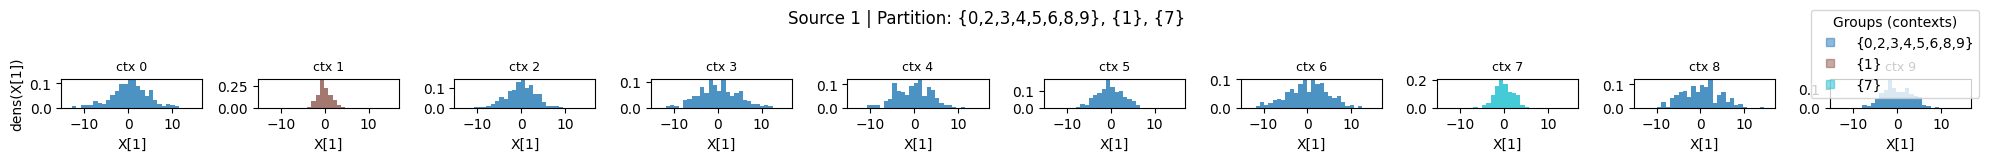

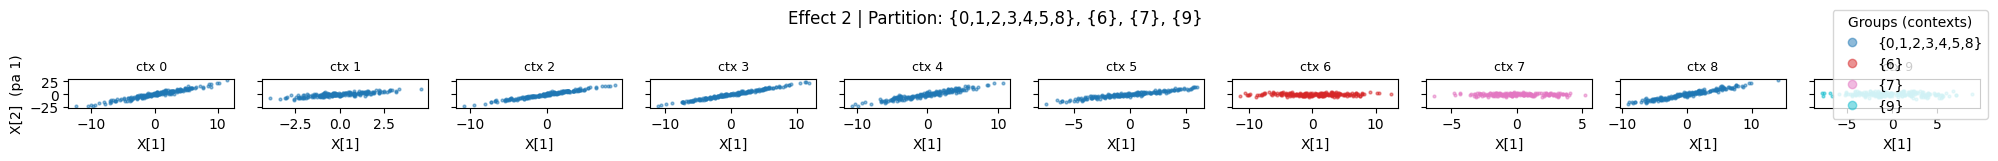

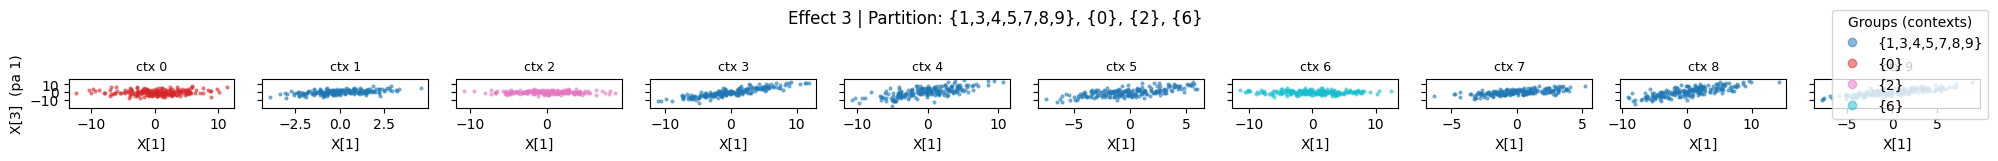

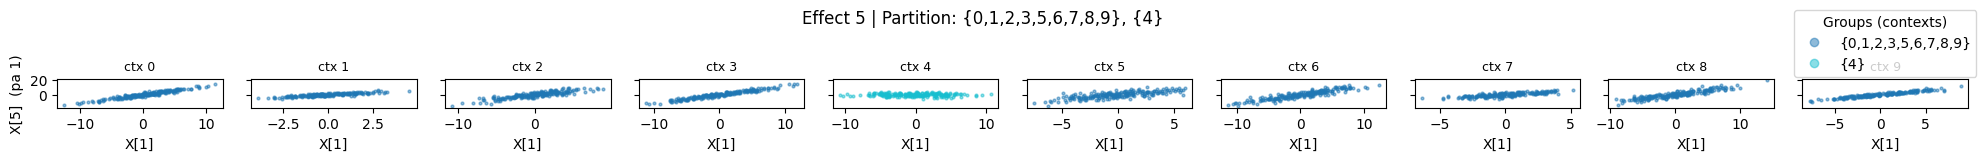

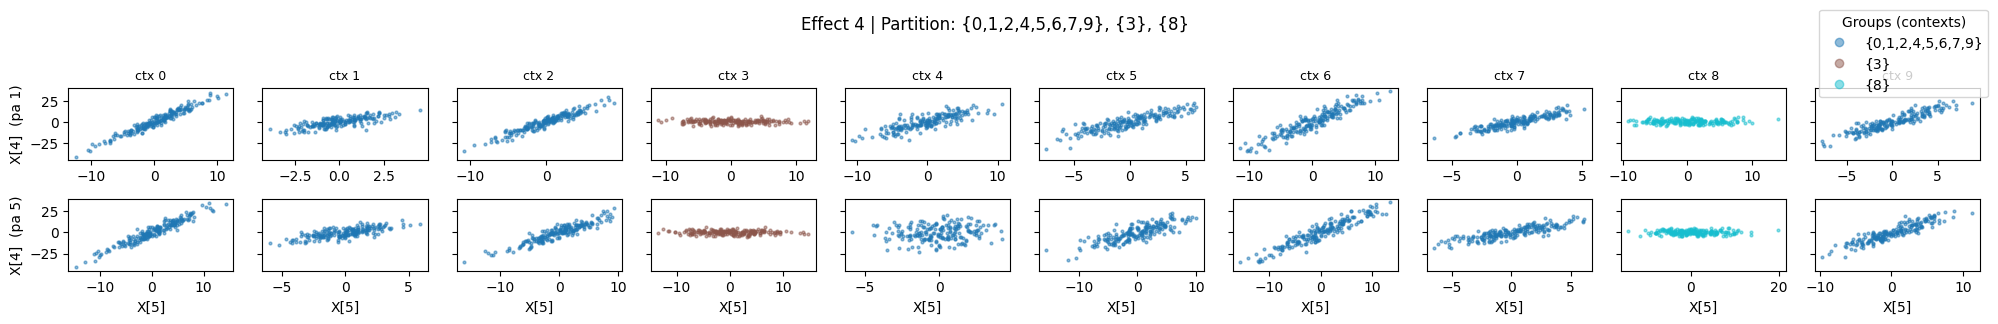

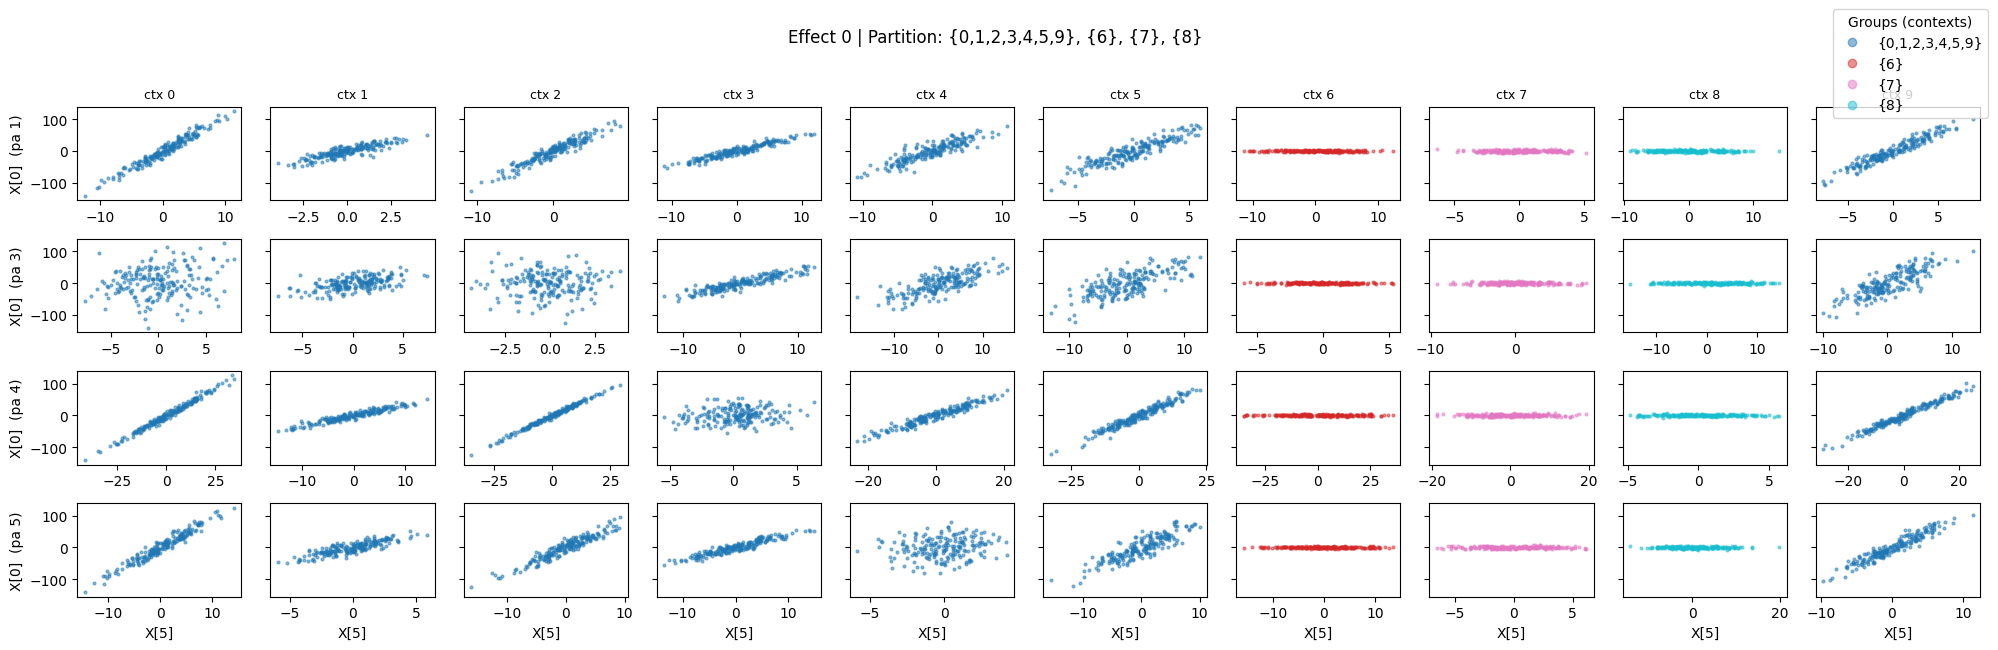

In [144]:
truths['_dg'].plot_X()

In [145]:
truths['true_g'].edges

OutEdgeView([(1, 0), (1, 2), (1, 3), (1, 4), (1, 5), (3, 0), (4, 0), (5, 0), (5, 4)])

C:\Users\msara\eda_impls\causalchange\src\causalchange\gen\synthetic\data_gen_context.py:589: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
C:\Users\msara\eda_impls\causalchange\src\causalchange\gen\synthetic\data_gen_context.py:589: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
C:\Users\msara\eda_impls\causalchange\src\causalchange\gen\synthetic\data_gen_context.py:589: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
C:\Users\msara\eda_impls\causalchange\src\causalchange\gen\synthetic\data_gen_context.py:589: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
C:\Users\msara\eda_impls\causalchange\src\causalchange\gen\synthetic\data_gen_context.py:589: UserWarning: This figure includes Axes that are not compatible with tight_layo

[<Figure size 600x220 with 3 Axes>,
 <Figure size 600x220 with 3 Axes>,
 <Figure size 600x220 with 3 Axes>,
 <Figure size 600x220 with 3 Axes>,
 <Figure size 600x220 with 3 Axes>,
 <Figure size 600x220 with 3 Axes>]

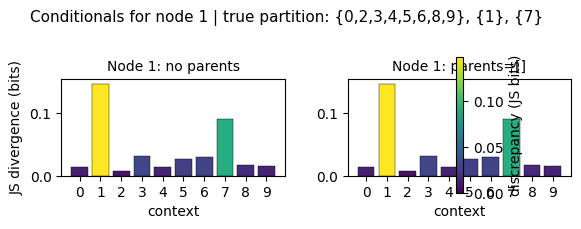

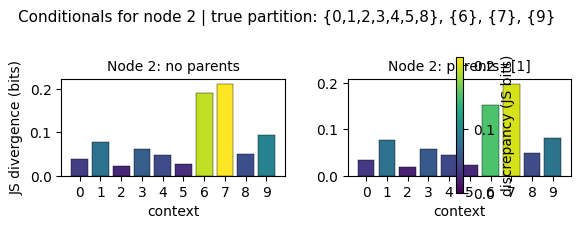

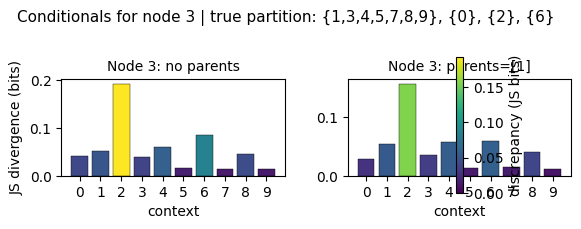

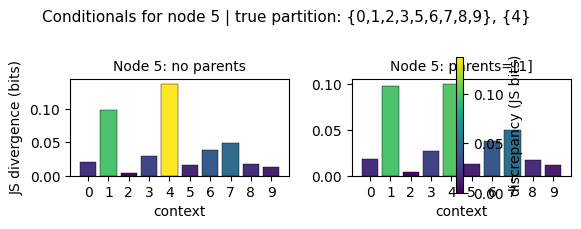

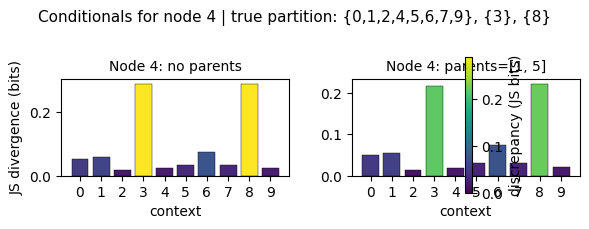

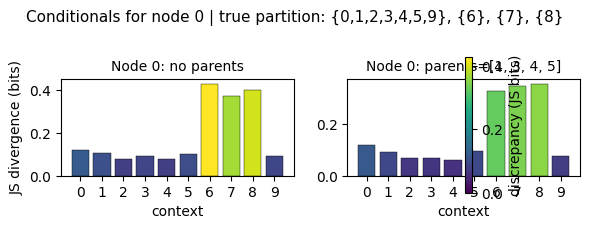

In [146]:
truths['_dg'].plot_conditionals_under(truths['true_g'])

In [147]:
cc = CausalChange(data_mode=DataMode.CONTEXTS, score_type=ScoreType.CI.value.KCI, graph_search=GraphSearch.CHAIN, vb=2,
                  truths=truths)
dag = cc.fit(X)

DataMode.CONTEXTS CIType.KCI 
	*** CausalChange, multi-context setting (kci) ***
	Next Source (MMD-single): 1, order []
	1. Source: 1	 current [1], true [1, 2, 3, 5, 4, 0]
	  +edge 1->0 (causal) (rel≥0.100)
	  +edge 1->2 (causal) (rel≥0.100)
	  +edge 1->3 (causal) (rel≥0.100)
	Next Source (MMD-single): 5, order [1]
	2. Source: 5	 current [1, 5], true [1, 2, 3, 5, 4, 0]
	  +edge 5->2 (spurious) (rel≥0.100)
	  +edge 5->4 (causal) (rel≥0.100)
	Next Source (MMD-single): 2, order [1, 5]
	3. Source: 2	 current [1, 5, 2], true [1, 2, 3, 5, 4, 0]
	  +edge 2->0 (spurious) (rel≥0.100)
	  +edge 2->4 (spurious) (rel≥0.100)
	  pruned incoming to 2: removed [(1, 2)]
	Next Source (MMD-single): 4, order [1, 5, 2]
	4. Source: 4	 current [1, 5, 2, 4], true [1, 2, 3, 5, 4, 0]
	  no outgoing edges added from 4 (rel_min=0.100)
	Next Source (MMD-single): 0, order [1, 5, 2, 4]
	5. Source: 0	 current [1, 5, 2, 4, 0], true [1, 2, 3, 5, 4, 0]
	  no outgoing edges added from 0 (rel_min=0.100)
	Next Source (MMD-s

In [141]:
print(dag.edges)
print(true_g.edges)

[(0, 1), (0, 2), (0, 3), (0, 4), (3, 1), (4, 1), (4, 2), (4, 3), (4, 5)]
[(0, 3), (2, 1), (3, 2), (3, 5), (4, 0), (4, 2), (4, 3), (4, 5), (5, 2)]


In [148]:
cc = CausalChange(data_mode=DataMode.CONTEXTS, score_type=ScoreType.CI.value.KCI, graph_search=GraphSearch.COMBO, vb=3,
                  truths=truths)
dag = cc.fit(X)

DataMode.CONTEXTS CIType.KCI 
	*** CausalChange, multi-context setting (kci) ***
	Next Source (combo weighted λ=0.70): 5, order []
	1. Source: 5	 current [5], true [1, 2, 3, 5, 4, 0]
	Next Source (combo weighted λ=0.70): 1, order [5]
	2. Source: 1	 current [5, 1], true [1, 2, 3, 5, 4, 0]
	Next Source (combo weighted λ=0.70): 0, order [5, 1]
	3. Source: 0	 current [5, 1, 0], true [1, 2, 3, 5, 4, 0]
	Next Source (combo weighted λ=0.70): 2, order [5, 1, 0]
	4. Source: 2	 current [5, 1, 0, 2], true [1, 2, 3, 5, 4, 0]
	Next Source (combo weighted λ=0.70): 3, order [5, 1, 0, 2]
	5. Source: 3	 current [5, 1, 0, 2, 3], true [1, 2, 3, 5, 4, 0]
	Next Source (combo weighted λ=0.70): 4, order [5, 1, 0, 2, 3]
	6. Source: 4	 current [5, 1, 0, 2, 3, 4], true [1, 2, 3, 5, 4, 0]
